   # Lecture 2: Euler's method

Suppose that we want to numerically solve a first order IVP of the form
\begin{align}
y'(x)&=f(x,y),\\
y(x_0) &=y_0
\end{align}
over the interval $[a,b]$.  Choosing some positive integer $n$, our goal is compute a table of points $(x_i,y_i)$ so that if $y$ is the true solution, then
\begin{equation}
y(x_i) = y_i
\end{equation}
for $n = 0,1,\dots, n$.  We say that there are $n$ steps, or equivalently $n+1$ mesh points or nodes.  The distance $h_i=x_{i+1}-x_i$ is called the $i$th step-size, which may be variable.  For much of the course, however, we will use a fixed step size $h=(b-a)/n$.

Once the mesh points have been chosen, the most straightforward approach to computing the $y_i$'s is known as Euler's method, which simply appeals to the idea of linearization from calculus.  Namely, if $y$ is the true solution and we assume that we have $y_i=y(x_i)$ exactly, then we have the approximation
\begin{equation}
\begin{split}
y(x_{i+1})&\approx y(x_i) + y'(x_i)(x_{i+1}-x_i)\\
&= y_i + f(x_i,y_i)h.
\end{split}
\end{equation}
**Euler's method** (a.k.a., the **foward Euler method**) recursively defines the $y_i$ by the formula
\begin{align*}
y_{i+1} &= y_i + f(x_i, y_i)h \qquad(0\le i< n),\\
y_0&=y(x_0).
\end{align*}

## Python implementation

The `math263` module contains the following implementation of the (foward) Euler method.
```python
def feuler(f, a, b, y0, n):
        '''
        numerically solves IVP
                y' = f(x,y), y(a)=y0
        over the interval [a, b] via n steps of the (foward) euler method 
        '''
        h = (b-a)/n;
        x = np.linspace(a, b, num=n+1);
        y = np.zeros(x.size);
        y[0] = y0;
        for k in range(n):
                y[k+1] = y[k] + h * f(x[k], y[k]);

        return (x, y)
```
The following cell loads the module and displays the usage information.

In [1]:
import math263
?math263.feuler

## Examples

We may empirically study the performance of the forward Euler method by using it to solve IVP's which we know how to solve analytically.

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

### Example 1.
Consider the IVP
\begin{align}
y'&= x^2 - y,\\
y(0)&=3
\end{align}
over the interval $[0, 2]$.

We first solve the problem symoblically.

Eq(y(x), x**2 - 2*x + 2 + exp(-x))

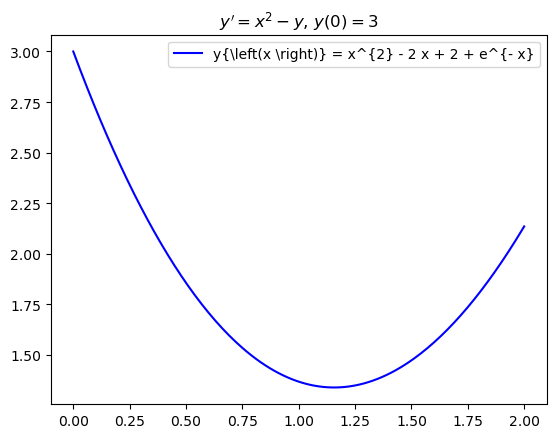

In [3]:
f = lambda x, y: x**2 - y;
a, b = 0, 2;
y0=3;
x = sp.Symbol('x');
y = sp.Function('y');
ode = sp.Eq(y(x).diff(x), f(x,y(x)));
soln=sp.dsolve(ode, y(x), ics={y(a): y0}); 
display(soln) 

y=sp.lambdify(x, soln.rhs, modules=['numpy']); 
hx = 0.01;
xvals = np.arange(a, b+hx, hx, dtype=np.double);
ex1=plt.figure();
plt.plot(xvals, y(xvals), color='b');
plt.title(r"$y' = x^2 - y$, $y(0)=3$");
plt.legend([f"{sp.latex(soln)}"], loc='upper right');

Next we solve the problem numerically with $n=20$ steps of our forward Euler implementation.

In [4]:
n = 20;
(x, y) = math263.feuler(f, a, b, y0, n)

Finally, we plot both the symbolic and the numerical solution together for comparison.

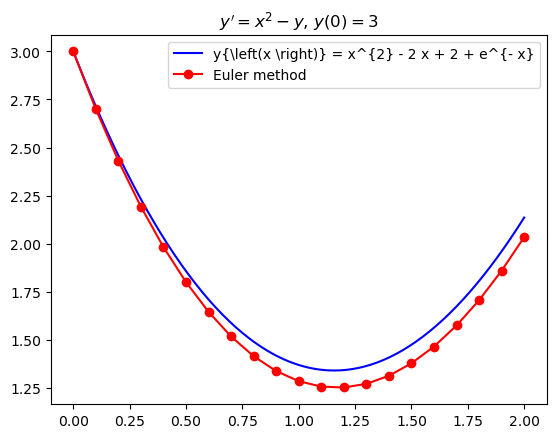

In [5]:
plt.figure(ex1);
plt.plot(x,y,'ro-')
plt.legend([f"{sp.latex(soln)}","Euler method"], loc='upper right');
plt.show()

### Example 2.
Now consider the IVP
\begin{align}
y' &= x + y,\\ 
y(0) &= 1
\end{align}
over the interval $[0, 10]$.

In [6]:
f = lambda x, y: x+y;
a, b = 0, 10;
y0=1;
n = 20;
(x, y) = math263.feuler(f, a, b, y0, n);